In [264]:
import numpy as np
import pandas as pd

%matplotlib inline
from seaborn import plt
from matplotlib import colors
from IPython.core.pylabtools import figsize
from IPython import display

In [374]:
from yvolv import world
from yvolv import beast
from yvolv import simulate

reload(world)
reload(beast)
reload(simulate)

<module 'yvolv.simulate' from '/Users/jeffschecter/code/yvolv/yvolv/simulate.pyc'>

In [ ]:
w = world.World(400, 200)
s = simulate.Simulation(w, 5000)

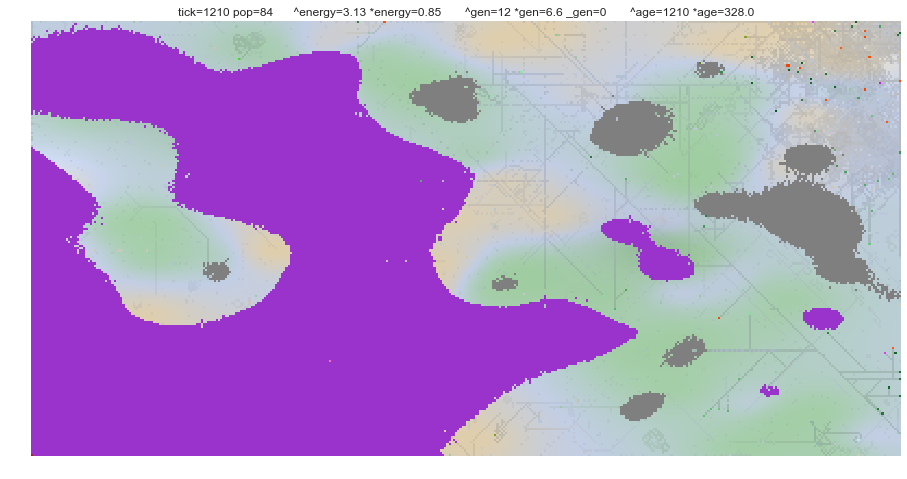

In [ ]:
figsize(16, 8)

for t in np.arange(10000):
    s.tick()
    if (t + 1) % 10 == 0:
        herd = s.herd
        emax = max(b.energy for b in herd)
        eavg = np.mean([b.energy for b in herd])
        gmax = max(b.generation for b in herd)
        gavg = np.mean([b.generation for b in herd])
        gmin = min(b.generation for b in herd)
        amax = max(b.age for b in herd)
        aavg = np.mean([b.age for b in herd])
        display.clear_output(wait=True)
        plt.imshow(s.image(), interpolation="none", filternorm=0)
        plt.title(
            "tick={} pop={}      "
            "^energy={} *energy={}       "
            "^gen={} *gen={} _gen={}       "
            "^age={} *age={}".format(
                s.world.age, len(s.herd),
                round(emax, 2), round(eavg, 2),
                gmax, round(gavg, 1), gmin,
                amax, round(aavg)))
        plt.axis("off")
        plt.show()

In [ ]:
figsize(16, 8)
_, axes = plt.subplots(3, 2)
axes = axes.flatten()
ticks = np.arange(len(s.births))
colors = ("red", "blue", "green", "purple", "orange", "turquoise")

for ser, col in zip((s.red_eaters, s.blue_eaters, s.green_eaters), colors):
    axes[0].plot(ticks[200:], ser[200:], color=col, label="{} eaters".format(col))
    axes[0].legend()
for ser, col, region in zip((s.pop_nw, s.pop_ne, s.pop_sw, s.pop_se), colors, ("nw", "ne", "sw", "se")):
    axes[2].plot(ticks[200:], ser[200:], color=col, label=region)
    axes[2].legend()
for ser, col in zip((s.red_food, s.blue_food, s.green_food), colors):
    axes[3].plot(ticks, ser, color=col, label="{} food".format(col))
    axes[3].legend()

axes[1].hist([bst.protein_hue for bst in s.herd], bins=np.arange(0, 1, 0.1))
    
axes[4].plot(ticks, s.herd_age, color="blue", label="age")
axes[4].plot(ticks, 100 * np.array(s.herd_energy), color="green", label="energy x 100")
axes[4].legend()

for ser, col, act in zip((s.lefts, s.forwards, s.rights, s.eats, s.reproduces, s.digs), colors, ("L", "F", "R", "E", "X", "D")):
    axes[5].plot(
        ticks, pd.Series(np.array(ser) / np.array(s.population).astype(float)).rolling(10).mean(),
        color=col, label=act, alpha=0.4)
axes[5].legend()
plt.show()